<a href="https://colab.research.google.com/github/viibhutisharma30/Sign_Language_Interpreter_Model/blob/main/Sign_Language_Interpreter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

C:\Users\ASUS\Desktop\jupyter_notebooks\env\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.2913 - loss: 2.3147 - val_accuracy: 0.8090 - val_loss: 0.6058
Epoch 2/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.7853 - loss: 0.6062 - val_accuracy: 0.8818 - val_loss: 0.3952
Epoch 3/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.8811 - loss: 0.3466 - val_accuracy: 0.9018 - val_loss: 0.3108
Epoch 4/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.9221 - loss: 0.2127 - val_accuracy: 0.9018 - val_loss: 0.2882
Epoch 5/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.9407 - loss: 0.1650 - val_accuracy: 0.9156 - val_loss: 0.3062
Epoch 6/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.9521 - loss: 0.1325 - val_accuracy: 0.9165 - val_loss: 0.3369
Epoch 7/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.9574 - loss: 0.1193 - val_accuracy: 0.9063 - val_loss: 0.3215
Epoch 8/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.9620 - loss: 0.1030 - val_accuracy

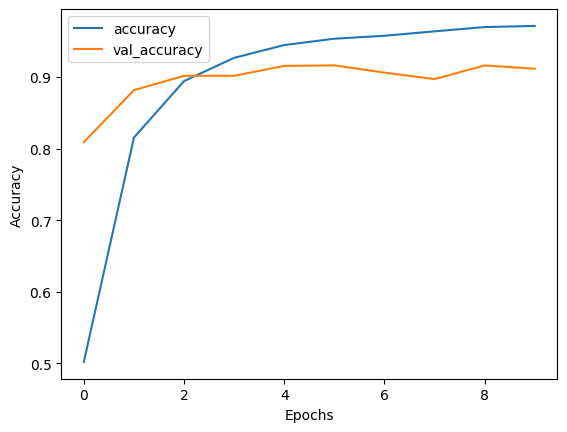

Model saved successfully.


In [ ]:
import cv2
import numpy as np
import tensorflow as tf
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load the datasets
train_data = pd.read_csv('sign_mnist_train.csv')
test_data = pd.read_csv('sign_mnist_test.csv')

# Separate features and labels for training and testing
X_train = train_data.iloc[:, 1:].values / 255.0  # Normalize pixel values
y_train = train_data.iloc[:, 0].values

X_test = test_data.iloc[:, 1:].values / 255.0  # Normalize pixel values
y_test = test_data.iloc[:, 0].values

# One-hot encode the labels
y_train = tf.keras.utils.to_categorical(y_train, num_classes=25)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=25)

# Reshape the data for the model
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

# Build a simple convolutional neural network using TensorFlow
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(25, activation='softmax')  # 25 classes for ASL
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

# Plot training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Save the trained model
model.save('sign_language_model.h5')
print("Model saved successfully.")


In [ ]:
import cv2
import numpy as np
import tensorflow as tf

# Load the trained model
model = tf.keras.models.load_model('sign_language_model.h5')
print("Model loaded successfully.")

# Real-time sign language detection using OpenCV
cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    if not ret:
        break

    # Preprocess the frame for the model
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    resized_frame = cv2.resize(gray, (28, 28))  # Resize to match the model input size
    normalized_frame = resized_frame / 255.0  # Normalize pixel values
    input_data = np.expand_dims(normalized_frame, axis=(0, -1))

    # Predict sign language gesture
    predictions = model.predict(input_data)
    predicted_label = np.argmax(predictions)

    # Display the prediction on the frame
    cv2.putText(frame, f"Prediction: {chr(predicted_label + 65)}", (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)
    cv2.imshow('Sign Language Interpreter', frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):  # Press 'q' to quit
        break

cap.release()
cv2.destroyAllWindows()


Model loaded successfully.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━